# Лабораторная работа № 4.5.3
# "Сканирующий интерферометр"
## Выполнили: 
- Самойленко Александр 778 гр.
- Усеинов Булат 778 гр.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate
import math
from IPython.core.display import Image, display

$\textbf{Цель работы}$: знакомство с устройством и работой газового лазера
непрерывного действия, со спектральными характеристиками лазерного излучения, а также с устройством и принципом действия сканирующего интерферометра Фабри-Перо.

$\textbf{В работе используются}$: Не–Nе-лазер с блоком питания; сканирующий интерферометр Фабри-Перо; поляроид; пластинка $\frac{\lambda}{4}$; линза;
фотодиод; электронный осциллограф.

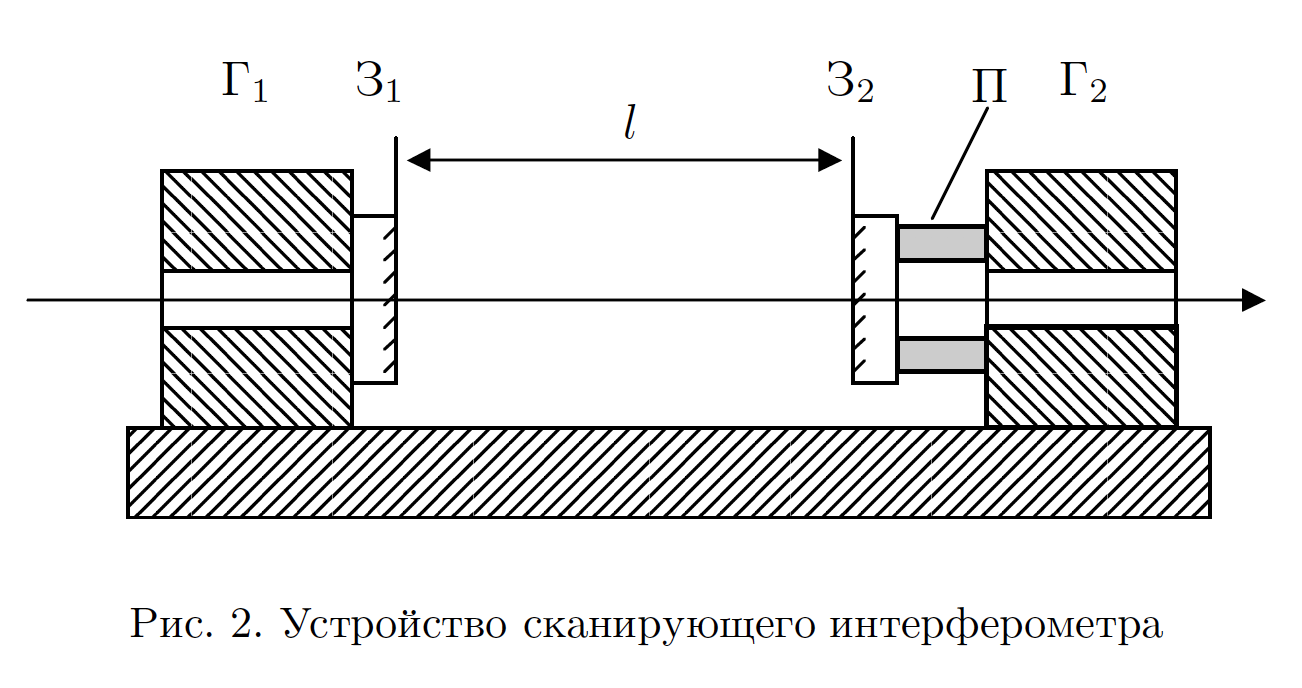

In [3]:
display(Image('1.png', width=500, unconfined=True))

$\textbf{Сканирующий интерферометр.}$ Для исследования межмодового
состава излучения $\rm He–Ne$-лазера в работе используется сканирующий
интерферометр, представляющий собой высокодобротный интерферометр Фабри–Перо с периодически изменяемой базой. Его устройство
схематически показано на рис. 2.
На жёстком массивном основании расположены две юстировочные
головки $Г_1$ и $Г_2$, на которых укреплены зеркала $З_1$ и $З_2$. Зеркало $З_1$
установлено непосредственно на головке $Г_1$, зеркало $З_2$ связано с го-
ловкой $Г_2$ через пьезокерамический элемент $П$. Юстировочные головки снабжены винтами, не показанными на рис. 2, которые позволяют в небольших пределах поворачивать зеркала относительно вертикальной и горизонтальной осей. С помощью головок $Г_1$ и $Г_2$ зеркала выставляются на параллельность. Пьезокерамический элемент $П$ позволяет периодически изменять базу интерферометра (l ∼ 10 см) на величину порядка длины световой волны. Элемент имеет форму полого цилиндра. Его внутренняя и наружная поверхности металлизированы и образуют цилиндрический конденсатор. Необходимое изменение длины цилиндра возникает при подаче напряжения в несколько сотен вольт.

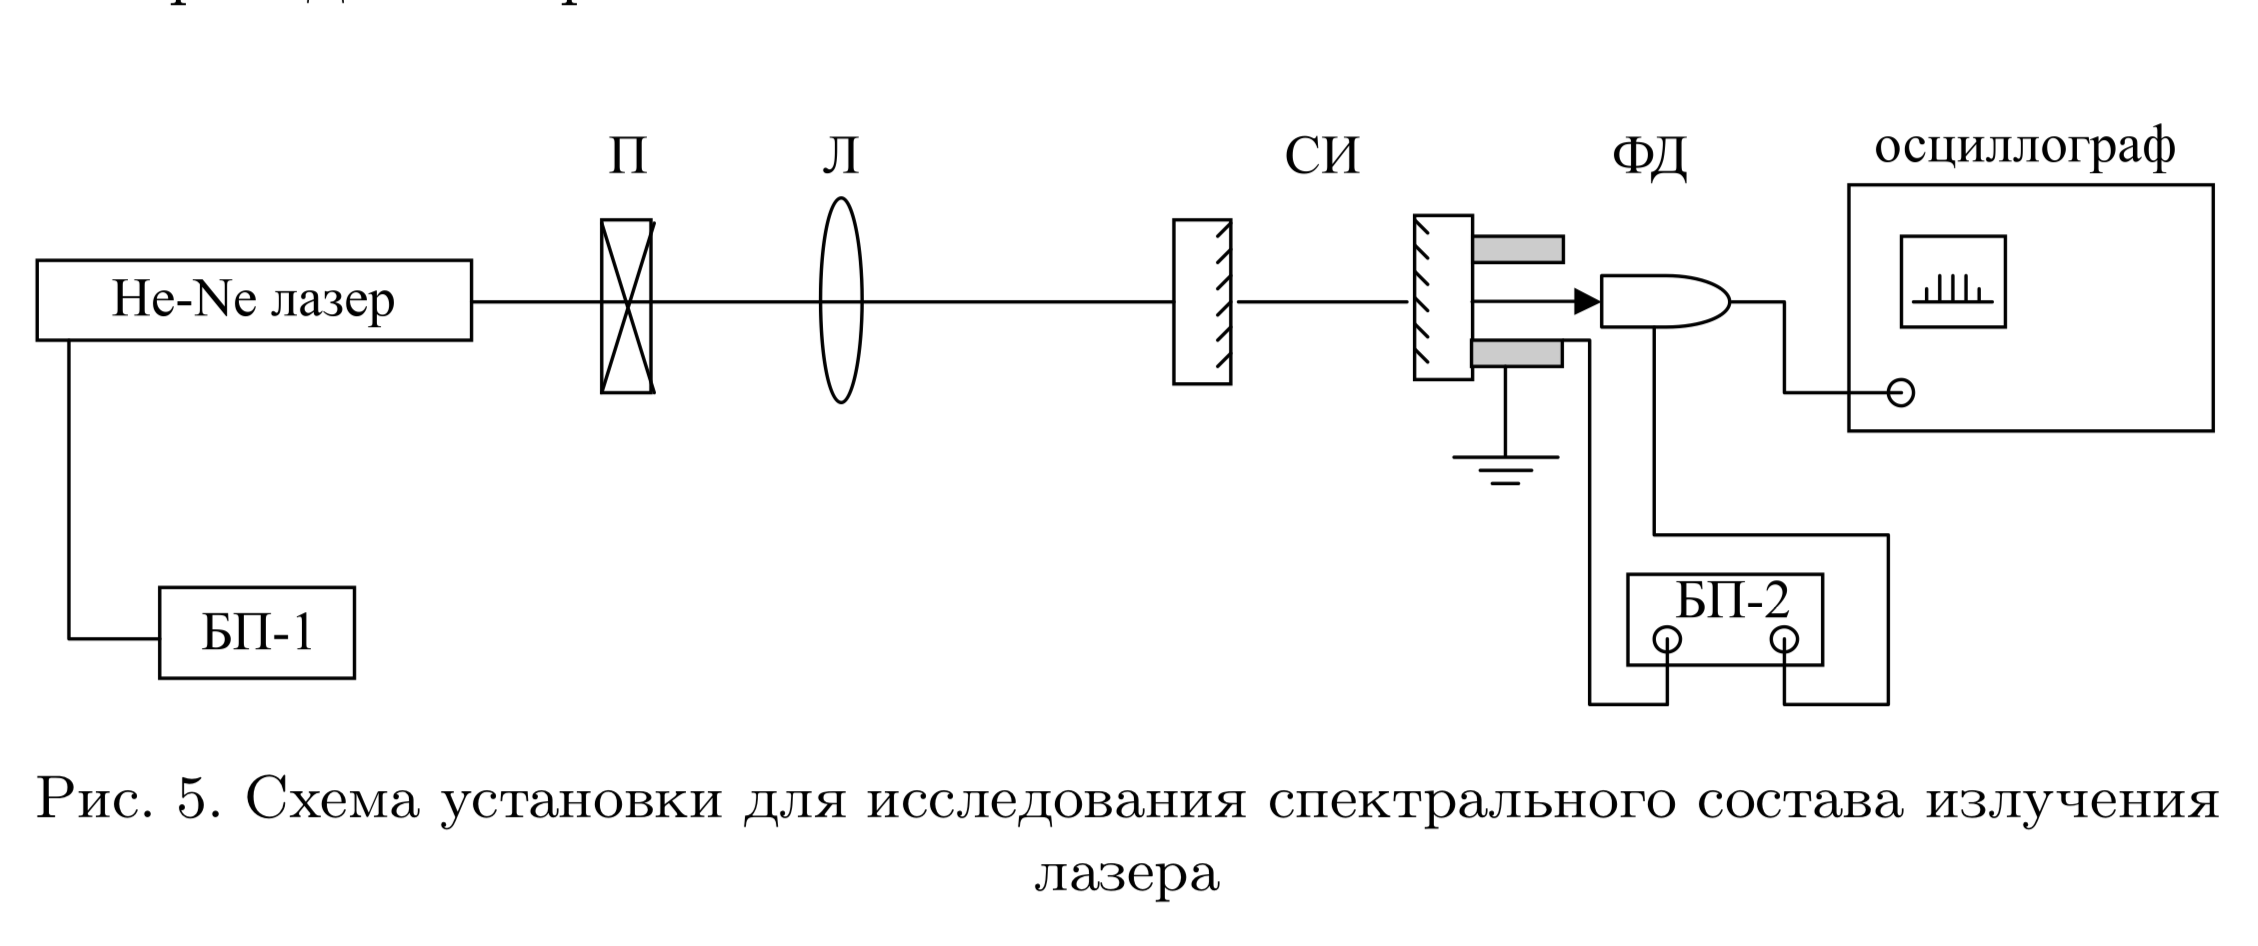

In [4]:
display(Image('2.png', width=700, unconfined=True))

$\textbf{Экспериметральная установка. }$
Излучение He–Ne-лазера проходит через поляризационную развязку Р и линзу Л и поступает на вход сканирующего интерферометра (СИ). Поляризационная развязка предотвращает попадание в лазер излучения, отразившегося от элементов оптического тракта. Это излучение может существенно повлиять на работу лазера и даже привести к срыву генерации. 

Развязка состоит из поляроида и пластинки λ/4, главные направления которой установлены под углом 45◦ по отношению к разрешённому направлению поляроида. После развязки П свет приобретает циркулярную поляризацию (например, по правому кругу). При отражении от передней поверхности линзы, от зеркала сканирующего интерферометра и т.п. свет распространяется в обратном направлении в виде левополяризованной волны. Такая волна, пройдя через пластинку λ/4, вновь приобретает линейную поляризацию. Однако направление колебаний в этой волне оказывается перпендикулярным направлению разрешённых колебаний поляроида, поэтому до лазера отражённая волна не доходит.
Линза Л служит для уменьшения расходимости пучка, поступающего на вход сканирующего интерферометра. Линза снабжена поперечными и продольными салазками для юстировки прибора на максимум сигнала.
Излучение, прошедшее сквозь сканирующий интерферометр, поступает на фотодиод ФД. Напряжение с фотодиода через усилитель подаётся на вертикальный вход электронного осциллографа ЭО.
Лазер питается от блока питания БП-1, фотодиод и усилитель — от БП-2. Напряжение на пьезоэлемент сканирующего интерферометра подаётся с блока питания БП-2 и регулируется ручкой 1.

$\textbf{Ход работы.}$

1) Рассчитаем межмодовое расстояние резонатора в единицах $\nu$ и $\lambda$, используя формулы
$$2L=m\lambda$$
$$\nu_{m+1} - \nu_m = \frac{c}{2L}$$

In [5]:
c = 300_000_000
L = 0.65
lamb = 6328 * 10**(-10)
delta_nu = c/(2*L)
delta_lambda = lamb ** 2 / (2 * L)

print("∆ν = {} МГц".format(round(delta_nu/10**6, 1)))

∆ν = 230.8 МГц


2) оценим видимую ширину спектральной линии неона $\Delta \lambda$ (Ne) (т.е. ширину спектра генерации лазера).

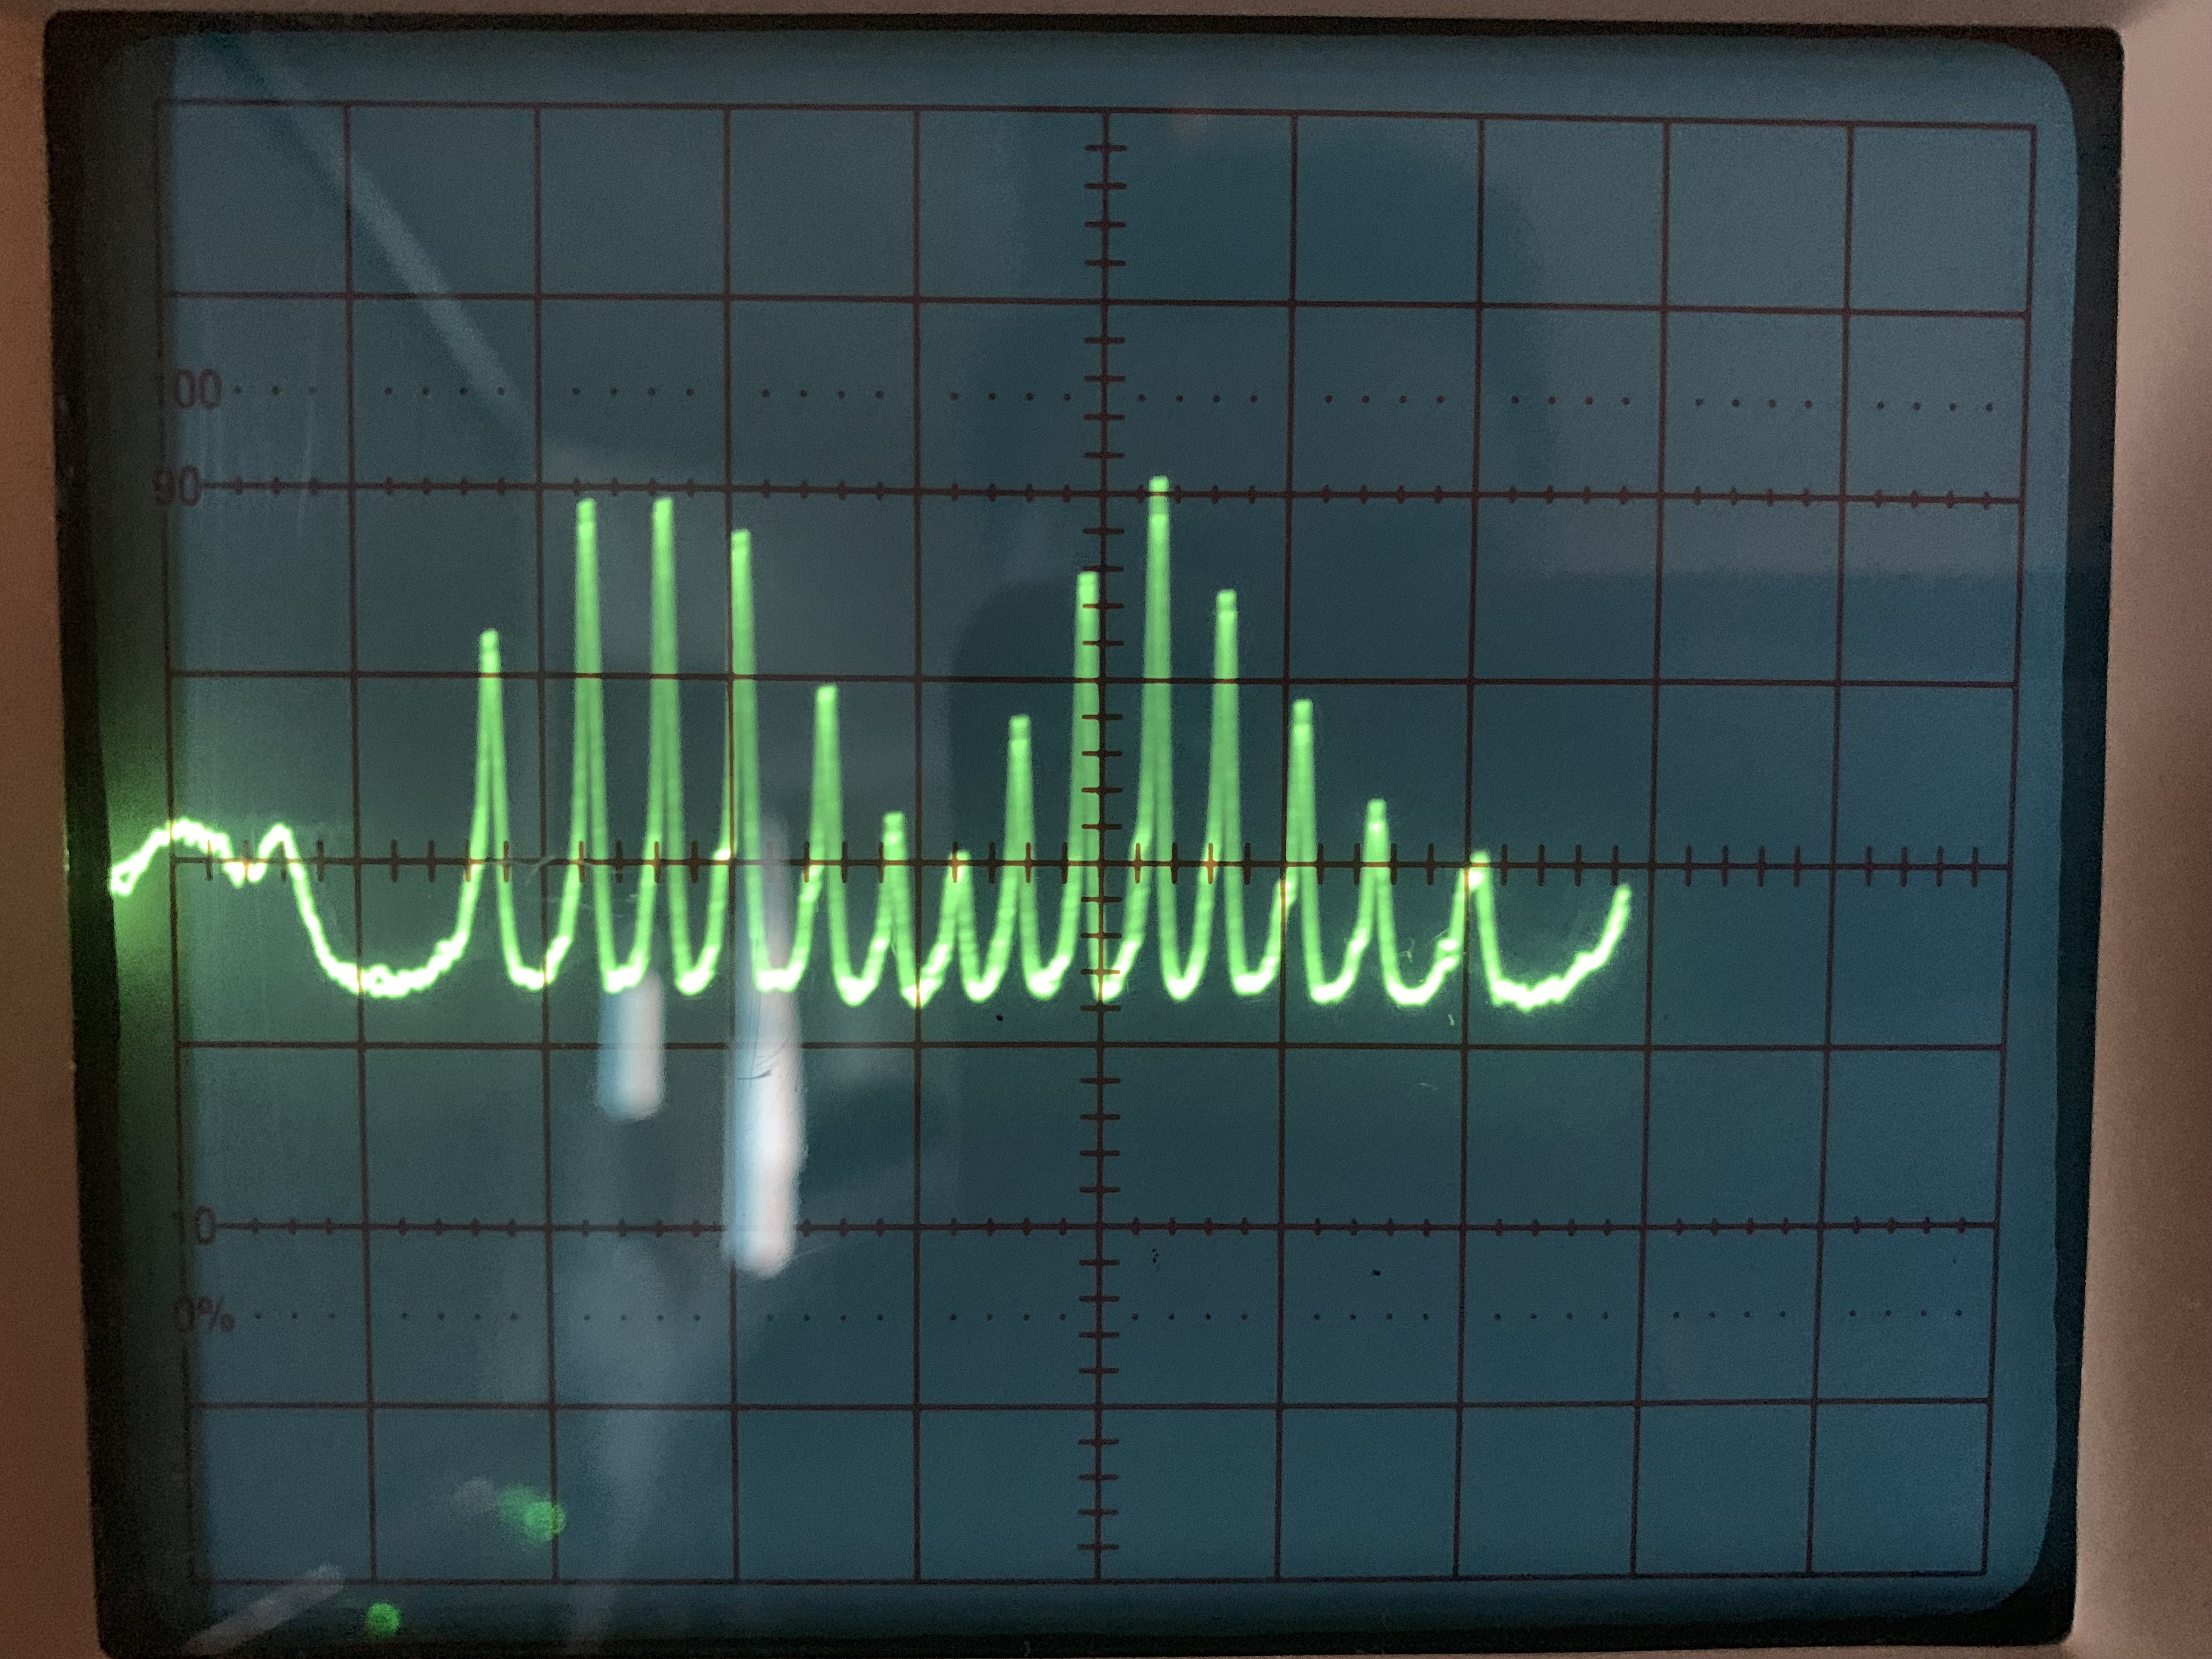

In [6]:
display(Image('3.jpg', width=500, unconfined=True))

In [7]:
lambda_ne = 7 * delta_lambda

print('∆λ(Ne) = {} нм'.format(round(lambda_ne * 10 **9, 4)))

∆λ(Ne) = 0.0022 нм


3) Полагая, что ширина спектральной линии обусловлена эффектом Доплера и что видимая ширина линии неона порядка полуширины доплеровского контура ($\Delta \lambda_{Ne}$ ∼ $\Delta \lambda_D$), оценим среднюю скорость атомов неона $V_x$ и газокинетическую температуру $T$ в разряде:

$$\frac{\Delta\lambda_D}{\lambda} \approx \frac{V_x}{c}; \ \ \ \ \ \frac{mV_x^2}{2} \approx \frac{kT}{2}$$

Здесь $V_x$ — скорость молекул неона вдоль оси лазера; $m_{Ne} = 20,2$ а.е.м.;
$1$ а.е.м. = $1,66 \cdot 10^{-24} $ г.

In [8]:
k, m = (1.38 * 10**(-23), 20.2 * 1.66 * 10**(-27))

V_x = c * lambda_ne / lamb

T = m * V_x ** 2 / k

print("Vx = {} м/с".format(round(V_x, 1)))
print("T = {} K".format(round(T, 0)))

Vx = 1022.2 м/с
T = 2539.0 K


Рассчитаем дисперсионную область $\Delta\lambda_{си}$ сканирующего интерферометра по формуле для $l = 9$ см и сравним её с видимой шириной линии неона $\Delta\lambda_{Ne}$.

$$\Delta\lambda_{си} = \frac{\lambda}{m} = \frac{\lambda^2}{2l}$$

In [9]:
l = 0.09 

delta_lambda_si = lamb ** 2 / (2 * l)

Сравнив ширину отдельной моды на полувысоте с межмодовым расстоянием, оценим разрешение $\delta\lambda$ сканирующего интерферометра и разрешающую способность $R$ по следующей формуле:
$$R = \frac{\lambda}{\delta\lambda}$$

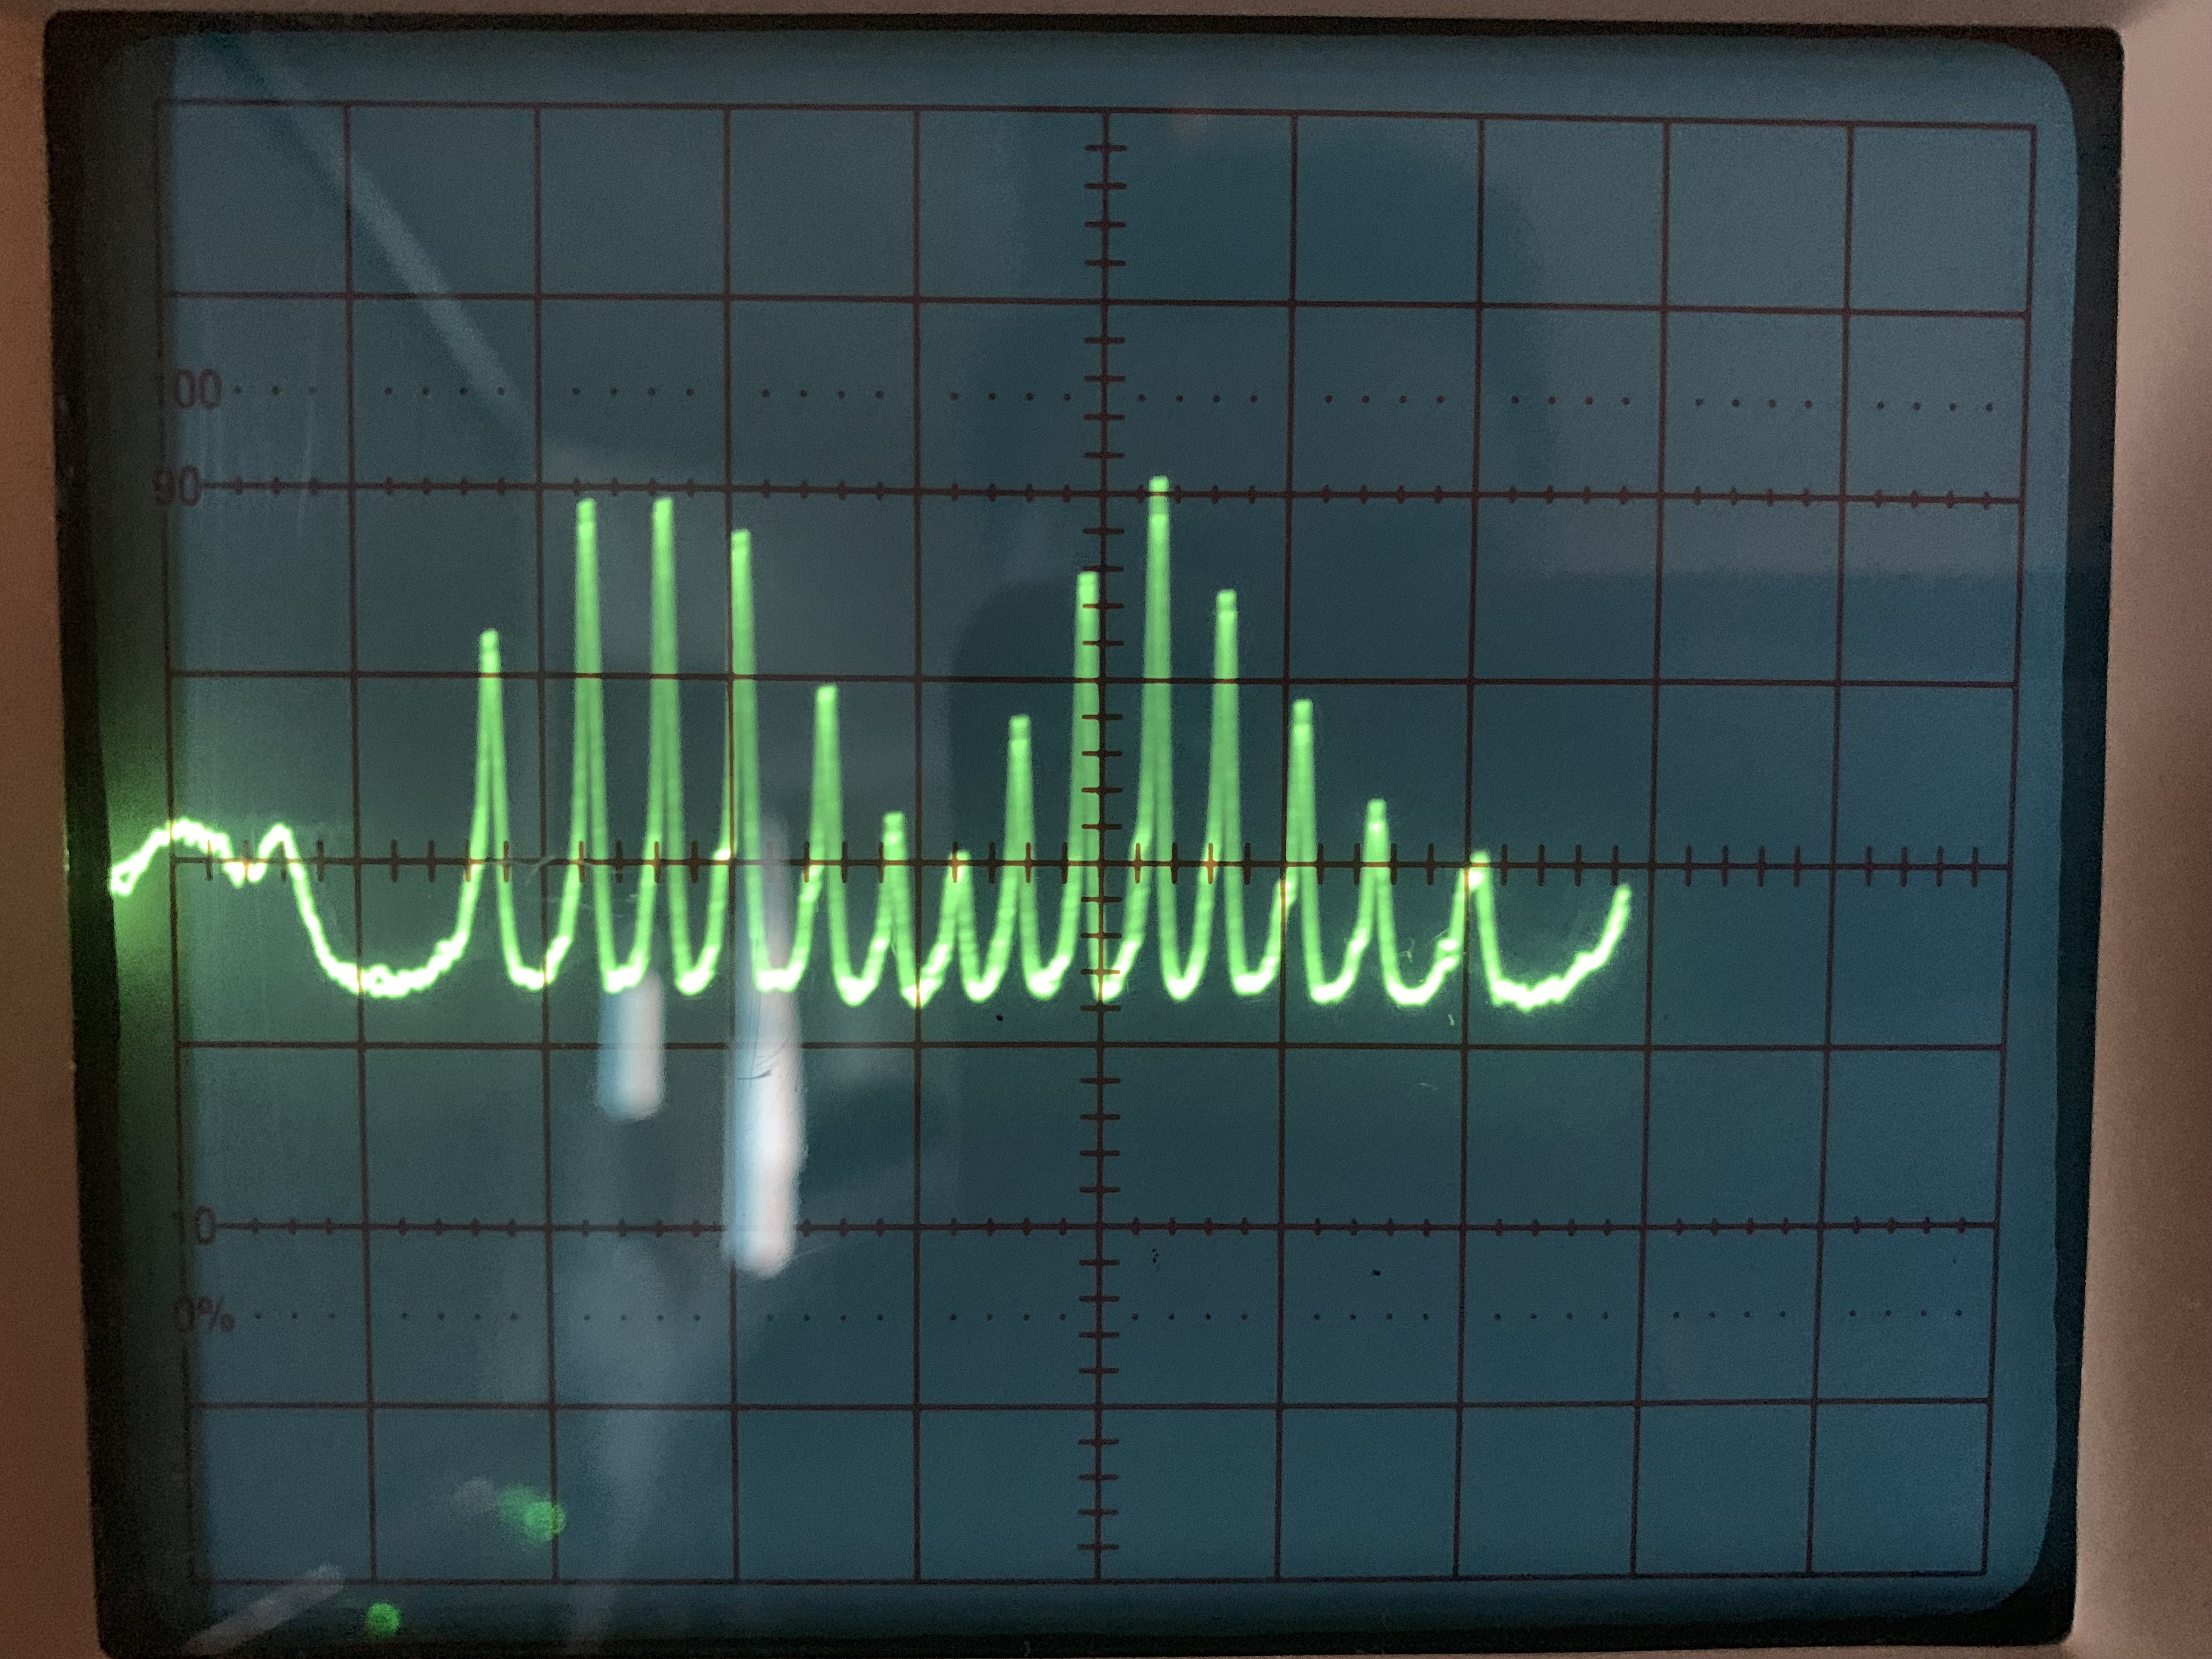

In [10]:
display(Image('3.jpg', width=500, unconfined=True))

In [11]:
d_lambda = lambda_ne * 0.75 / 28

R = lamb / d_lambda

print("R = ", round(R/10**6, 1), "* 10^6")

R =  11.0 * 10^6


Оценим коэффициент отражения зеркал интерферометра $r$ по формуле:

$$R = \frac{2\pi l}{\lambda(1-r)}$$

$$r = 1 - \frac{2\pi l}{R\lambda}$$

In [12]:
r = 1 - 2 * np.pi * l / (R * lamb)
print("r ≈ ", round(100 * r, 1), "%")

r ≈  91.8 %


Сканирующий интерферометр, применяемый в настоящей работе, имеет зеркала с коэффициентом отражения r ≈ 98,5%

In [12]:
class Fib:
    def _init_(self, maxi):
        self.maxi = 10
    def _iter_(self):
        self.a = 0
        self.b = 1
        return self
    def _next_(self):
        fib = self.a
        if fib > self.max:
            raise StopIteration
        self.a, self.b = self.b, self.a + self.b
        return fib